#  <span style="color:orange">Clustering Tutorial (CLU101) - Level Beginner</span>

**Created using: PyCaret 2.2** <br />
**Date Updated: November 25, 2020**

# 1.0 Tutorial Objective
Welcome to the Clustering Tutorial **(CLU101)** - Level Beginner. This tutorial assumes that you are new to PyCaret and looking to get started with clustering using `pycaret.clustering` Module.

In this tutorial we will learn:


* **Getting Data:**  How to import data from PyCaret repository
* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building multiclass models
* **Create Model:** How to create a model and assign cluster labels to the original dataset for analysis
* **Plot Model:**  How to analyze model performance using various plots
* **Predict Model:** How to assign cluster labels to new and unseen datasets based on a trained model
* **Save / Load Model:**  How to save / load model for future use

Read Time : Approx. 25 Minutes


# 1.1 Installing PyCaret
The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

# Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

# Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


# 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Clustering

# 1.3 For Google colab users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

# 1.4 See also:
- __[Clustering Tutorial (CLU102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Clustering%20Tutorial%20Level%20Intermediate%20-%20CLU102.ipynb)__
- __[Clustering Tutorial (CLU103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Clustering%20Tutorial%20Level%20Expert%20-%20CLU103.ipynb)__

# 2.0 What is Clustering?
Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups. It is an exploratory data mining activity, and a common technique for statistical data analysis used in many fields including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression and computer graphics. Some common real life use cases of clustering are:

- Customer segmentation based on purchase history or interests to design targetted marketing compaigns.
- Cluster documents into multiple categories based on tags, topics, and the content of the document.
- Analysis of outcome in social / life science experiments to find natural groupings and patterns in the data.

__[Learn More about Clustering](https://en.wikipedia.org/wiki/Cluster_analysis)__

# 3.0 Overview of Clustering Module in PyCaret
PyCaret's clustering module (`pycaret.clustering`) is a an unsupervised machine learning module which performs the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups. 

PyCaret's clustering module provides several pre-processing features that can be configured when initializing the setup through the `setup()` function. It has over 8 algorithms and several plots to analyze the results. PyCaret's clustering module also implements a unique function called `tune_model()` that allows you to tune the hyperparameters of a clustering model to optimize a supervised learning objective such as `AUC` for classification or `R2` for regression.

# 4.0 Dataset for the Tutorial

For this tutorial we will use a dataset from UCI called **Mice Protein Expression**. The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.  __[Click Here](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)__ to read more about the dataset.


# Dataset Acknowledgement:
Clara Higuera Department of Software Engineering and Artificial Intelligence, Faculty of Informatics and the Department of Biochemistry and Molecular Biology, Faculty of Chemistry, University Complutense, Madrid, Spain.
Email: clarahiguera@ucm.es

Katheleen J. Gardiner, creator and owner of the protein expression data, is currently with the Linda Crnic Institute for Down Syndrome, Department of Pediatrics, Department of Biochemistry and Molecular Genetics, Human Medical Genetics and Genomics, and Neuroscience Programs, University of Colorado, School of Medicine, Aurora, Colorado, USA.
Email: katheleen.gardiner@ucdenver.edu

Krzysztof J. Cios is currently with the Department of Computer Science, Virginia Commonwealth University, Richmond, Virginia, USA, and IITiS Polish Academy of Sciences, Poland.
Email: kcios@vcu.edu

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)__ 

# 5.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require internet connection).

In [1]:
from pycaret.datasets import get_data
dataset = get_data('mice')

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [2]:
#check the shape of data
dataset.shape

(1080, 82)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 5% (54 records) has been withheld from the original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 54 samples were not available at the time when this experiment was performed.

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


# 6.0 Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [4]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, use_gpu=True,
                   ignore_features = ['MouseID'])

Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Missing Values :**  When there are missing values in original data this will show as True. Notice that `Missing Values` in the information grid above is `True` as the data contains missing values which are automatically imputed using `mean` for numeric features and `constant` for categorical features. The method of imputation can be changed using the `numeric_imputation` and `categorical_imputation` parameters in `setup()`. <br/>
<br/>
- **Original Data :**  Displays the original shape of dataset. In this experiment (1026, 82) means 1026 samples and 82 features. <br/>
<br/>
- **Transformed Data :** Displays the shape of the transformed dataset. Notice that the shape of the original dataset (1026, 82) is transformed into (1026, 91). The number of features has increased due to encoding of categorical features in the dataset. <br/>
<br/>
- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 77 out of 82 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  The number of features inferred as categorical. In this dataset, 5 out of 82 features are inferred as categorical. Also notice that we have ignored one categorical feature `MouseID` using the `ignore_feature` parameter. <br/>
<br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# 7.0 Create a Model

Training a cluster model in PyCaret is simple and similar to how you would create a model in the supervised learning modules. A clustering model is created using the `create_model()` function which takes one mandatory parameter: the ID of a model you want to train. This function returns a trained model object and few unsupervised metrics. See an example below:

In [5]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1191           137.3643          2.0829            0           0   

   Completeness  
0             0

In [6]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5037, tol=0.0001, verbose=0)


We have created a kmeans model using `create_model()`. Notice the `n_clusters` parameter is set to `4` which is the default when you do not pass a value to the `num_clusters` parameter. In the below example we will create a `kmodes` model with 6 clusters.

In [7]:
kmodes = create_model('kmodes', num_clusters = 6)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0262            47.0119          3.7958            0           0   

   Completeness  
0             0

In [8]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7f30a3f920d0>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=5037,
       verbose=0)


Simply replacing `kmeans` with `kmodes` inside `create_model()` has created a`kmodes` clustering model. There are 9 models available in the `pycaret.clustering` module. To see the complete list of models in the library please see `docstring` or use `models` function.

In [9]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

# 8.0 Assign a Model

Now that we have created a model, we would like to assign the cluster labels to our dataset (1080 samples) to analyze the results. We will achieve this by using the `assign_model()` function. See an example below:

In [10]:
kmean_results = assign_model(kmeans)
kmean_results.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0  3501_12  0.344930  0.626194  0.383583  2.534561  4.097317  0.303547   
1   3520_5  0.630001  0.839187  0.357777  2.651229  4.261675  0.253184   
2  3414_13  0.555122  0.726229  0.278319  2.097249  2.897553  0.222222   
3   3488_8  0.275849  0.430764  0.285166  2.265254  3.250091  0.189258   
4   3501_7  0.304788  0.617299  0.335164  2.638236  4.876609  0.280590   

    pBRAF_N  pCAMKII_N   pCREB_N  ...     SYP_N  H3AcK18_N    EGR1_N  \
0  0.222829   4.592769  0.239427  ...  0.455172   0.252700  0.218868   
1  0.185257   3.816673  0.204940  ...  0.496423   0.155008  0.153219   
2  0.174356   1.867880  0.203379  ...  0.344964   0.136109  0.155530   
3  0.157837   2.917611  0.202594  ...  0.390880   0.127944  0.207671   
4  0.199417   4.835421  0.236314  ...  0.470932   0.245277  0.202171   

   H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class    Cluster  
0  0.249187  1.139493    Ts65Dn  Memantine       S/C  t-SC-m  Cluster 0  
1       NaN  1.642886   Control  Memantine       C/S  c-CS-m  Cluster 1  
2  0.185484  1.657670    Ts65Dn  Memantine       C/S  t-CS-m  Cluster 3  
3  0.175357  0.893598   Control     Saline       S/C  c-SC-s  Cluster 3  
4  0.240372  0.795637    Ts65Dn  Memantine       S/C  t-SC-m  Cluster 0  

[5 rows x 83 columns]

Notice that a new column called `Cluster` has been added to the original dataset. `kmean_results` also includes the `MouseID` feature that we dropped during the `setup()` but it was not used for the model and is only appended to the dataset when you use `assign_model()`. In the next section we will see how to analyze the results of clustering using `plot_model()`. 

# 9.0 Plot a Model

The `plot_model()` function can be used to analyze different aspects of the clustering model. This function takes a trained model object and returns a plot. See examples below:

# 9.1 Cluster PCA Plot

In [11]:
plot_model(kmeans)

The cluster labels are automatically colored and shown in a legend. When you hover over the data points you will see additional features which by default use the first column of dataset (in this case MouseID). You can change this by passing the `feature` parameter and you may also set `label` to `True` if you want labels to be printed on the plot.

# 9.2 Elbow Plot

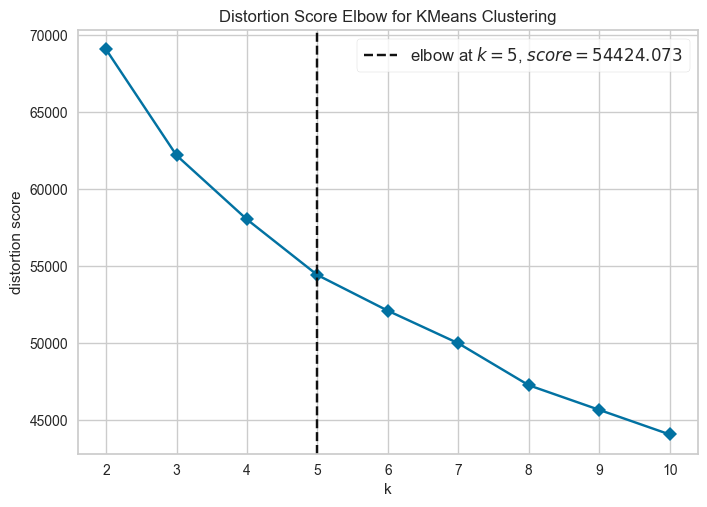

In [12]:
plot_model(kmeans, plot = 'elbow')

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. In this example the Elbow plot above suggests that `5` is the optimal number of clusters. 

__[Learn More about Elbow Plot](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)__

# 9.3 Silhouette Plot

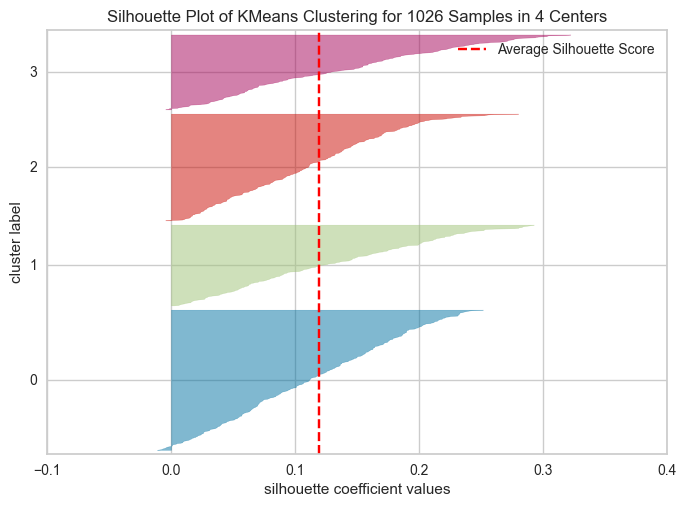

In [13]:
plot_model(kmeans, plot = 'silhouette')

Silhouette is a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. In other words, the silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

__[Learn More about Silhouette Plot](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)__

# 9.4 Distribution Plot

In [14]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

The distribution plot shows the size of each cluster. When hovering over the bars you will see the number of samples assigned to each cluster. From the example above, we can observe that cluster 3 has the highest number of samples. We can also use the `distribution` plot to see the distribution of cluster labels in association with any other numeric or categorical feature. See an example below:

In [15]:
plot_model(kmeans, plot = 'distribution', feature = 'class')

In the above example we have used `class` as a feature so each bar represents a `class` which is colored with a cluster label (legend on right). We can observe that class `t-SC-m` and `c-SC-m` is mostly dominated by `Cluster 3`. We can also use the same plot to see the distribution of any continious feature. See an example below:

In [16]:
plot_model(kmeans, plot = 'distribution', feature = 'CaNA_N')

# 10.0 Predict on unseen data

The `predict_model()` function is used to assign cluster labels to a new unseen dataset. We will now use our `kmeans` model to predict the data stored in `data_unseen`. This variable was created at the beginning of the tutorial and contains 54 samples from the original dataset that were never exposed to PyCaret.

In [17]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0    309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
1    311_3  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323   
2    321_4  0.505093  0.695549  0.376029  2.915585  5.917957  0.226734   
3  3415_12  0.429133  0.563175  0.258429  2.028151  3.542553  0.214075   
4  3415_15  0.373648  0.471165  0.257909  1.860032  2.938526  0.218262   

    pBRAF_N  pCAMKII_N   pCREB_N  ...     SYP_N  H3AcK18_N    EGR1_N  \
0  0.176233   2.141282  0.195188  ...  0.439833   0.116657  0.140766   
1  0.165058   2.107281  0.171401  ...  0.454509   0.111089  0.157731   
2  0.174271   2.663039  0.190038  ...  0.591586   0.131515  0.188391   
3  0.176759   3.165139  0.167430  ...  0.371618   0.118223  0.171071   
4  0.150380   2.610132  0.142571  ...  0.277665   0.086785  0.126537   

   H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class    Cluster  
0  0.142180  1.816389   Control  Memantine       C/S  c-CS-m  Cluster 2  
1  0.158543  1.404481   Control  Memantine       C/S  c-CS-m  Cluster 2  
2       NaN  1.699260   Control  Memantine       C/S  c-CS-m  Cluster 1  
3  0.173702  1.405727   Control  Memantine       C/S  c-CS-m  Cluster 3  
4  0.112690  0.790975   Control  Memantine       C/S  c-CS-m  Cluster 3  

[5 rows x 83 columns]

The `Cluster` column indicating the cluster label predicted from the trained `kmeans` model is added onto `data_unseen`.

# 11.0 Saving the model

We have now finished the experiment by using our `kmeans` model to predict labels on unseen data. 

This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [18]:
save_model(kmeans,'Final KMeans Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['MouseID'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numer...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 

# 12.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [19]:
saved_kmeans = load_model('Final KMeans Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we have used in section 10 above.

In [20]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [21]:
new_prediction.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0    309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
1    311_3  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323   
2    321_4  0.505093  0.695549  0.376029  2.915585  5.917957  0.226734   
3  3415_12  0.429133  0.563175  0.258429  2.028151  3.542553  0.214075   
4  3415_15  0.373648  0.471165  0.257909  1.860032  2.938526  0.218262   

    pBRAF_N  pCAMKII_N   pCREB_N  ...     SYP_N  H3AcK18_N    EGR1_N  \
0  0.176233   2.141282  0.195188  ...  0.439833   0.116657  0.140766   
1  0.165058   2.107281  0.171401  ...  0.454509   0.111089  0.157731   
2  0.174271   2.663039  0.190038  ...  0.591586   0.131515  0.188391   
3  0.176759   3.165139  0.167430  ...  0.371618   0.118223  0.171071   
4  0.150380   2.610132  0.142571  ...  0.277665   0.086785  0.126537   

   H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class    Cluster  
0  0.142180  1.816389   Control  Memantine       C/S  c-CS-m  Cluster 2  
1  0.158543  1.404481   Control  Memantine       C/S  c-CS-m  Cluster 2  
2       NaN  1.699260   Control  Memantine       C/S  c-CS-m  Cluster 1  
3  0.173702  1.405727   Control  Memantine       C/S  c-CS-m  Cluster 3  
4  0.112690  0.790975   Control  Memantine       C/S  c-CS-m  Cluster 3  

[5 rows x 83 columns]

Notice that the results of `unseen_predictions` and `new_prediction` are identical.

# 13.0 Wrap-up / Next Steps?

We have only covered the basics of `pycaret.clustering`. In following tutorials we will go deeper into advanced pre-processing techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist. 

See you at the next tutorial. Follow the link to __[Clustering Tutorial (CLU102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Clustering%20Tutorial%20Level%20Intermediate%20-%20CLU102.ipynb)__